<a href="https://colab.research.google.com/github/FlexTaco/cs370/blob/main/assignments/assignment-1/01-assignment-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Development Environment Setup


In [ ]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device

device(type='cpu')

## Simulation of Multivariate Normal Distribution


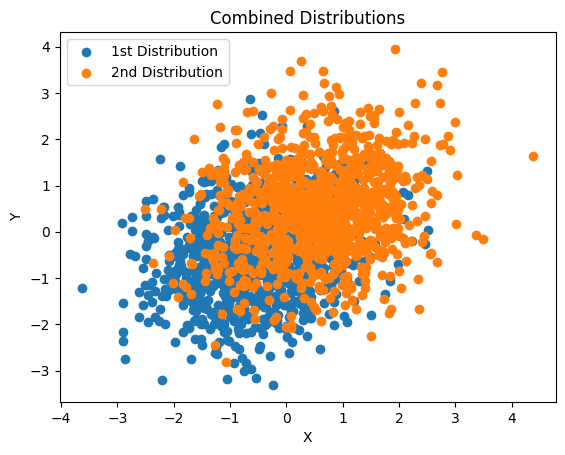

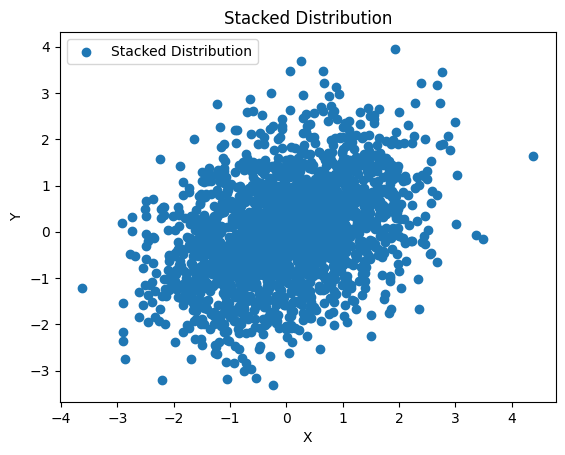

In [59]:
import torch
import matplotlib.pyplot as plt

µ = torch.tensor([-0.5, -0.5])
cov = torch.tensor([[1, 0.25], [0.25, 1]])

µ2 = torch.tensor([0.5, 0.5])
cov2 = torch.tensor([[1, 0.25], [0.25, 1]])

firstSample = torch.distributions.MultivariateNormal(µ, cov).sample((1000,))
secondSample = torch.distributions.MultivariateNormal(µ2, cov2).sample((1000,))

plt.scatter(firstSample[:, 0], firstSample[:, 1], label='1st Distribution')
plt.scatter(secondSample[:, 0], secondSample[:, 1], label='2nd Distribution')
plt.title('Combined Distributions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

stacked_samples = torch.cat((firstSample, secondSample))

plt.scatter(stacked_samples[:, 0], stacked_samples[:, 1], label='Stacked Distribution')
plt.title('Stacked Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## K-Means Clustering


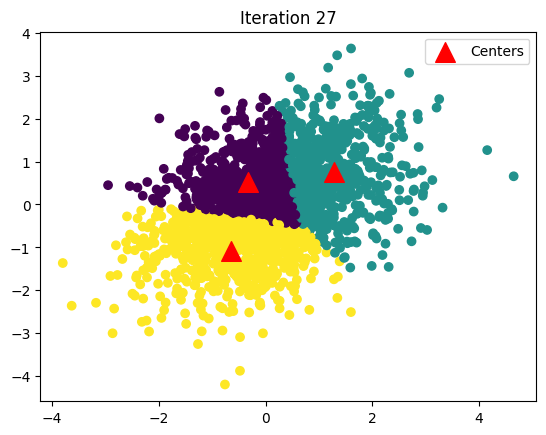

In [58]:
import torch
import matplotlib.pyplot as plt

# from previous assignment
µ = torch.tensor([-0.5, -0.5])
cov = torch.tensor([[1, 0.25], [0.25, 1]])

µ2 = torch.tensor([0.5, 0.5])
cov2 = torch.tensor([[1, 0.25], [0.25, 1]])

firstSample = torch.distributions.MultivariateNormal(µ, cov).sample((1000,))
secondSample = torch.distributions.MultivariateNormal(µ2, cov2).sample((1000,))

stacked_samples = torch.cat((firstSample, secondSample))

# number of k
k = 3

# random cluster centers
def random_center():
  random = stacked_samples[torch.randint(0, stacked_samples.shape[0], (k,))]
  return random

def plot(iteration,center,stacked_samples):
  clear_output(wait=True)
  plt.scatter(stacked_samples[:, 0], stacked_samples[:, 1], c=labels, cmap='viridis', marker='o')
  plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='^', s=200, label='Centers')
  plt.title(f'Iteration {iteration}')
  plt.legend()
  plt.show()


def new_center(stacked_samples):
  return torch.stack([stacked_samples[labels == i].mean(dim=0) for i in range(k)])


centers = random_center()

iteration = 1
new_centers = torch.zeros(3, 2)

#change number of iterations
n_iter = 100

# while iteration < n_iter and not torch.equal(centers, new_centers):
while iteration < n_iter:
    distances = torch.cdist(stacked_samples, centers)
    labels = torch.argmin(distances, dim=1)
    new_centers = new_center(stacked_samples)

    # check if centers stop changing. can probably fit in the while loop condition but kept getting errors
    if torch.allclose(centers, new_centers, atol=1e-4):
        break

    centers = new_centers
    plot(iteration,centers,stacked_samples)
    iteration+=1




## Projection with Principal Components Analysis (PCA)

Principal component 0
tensor([-0.1744,  0.1872, -0.8993, -0.3548])

Principal component 1
tensor([ 0.4968,  0.7880, -0.0729,  0.3563])

Principal component 2
tensor([-0.1916, -0.3017, -0.3649,  0.8597])

Principal component 3
tensor([ 0.8283, -0.5030, -0.2300, -0.0896])

Principal components from torch.pca_lowrank:
tensor([[-0.1744, -0.4968, -0.1916,  0.8283],
        [ 0.1872, -0.7880, -0.3017, -0.5031],
        [-0.8993,  0.0729, -0.3648, -0.2300],
        [-0.3548, -0.3563,  0.8597, -0.0895]])
Principal components from calculation:
tensor([[-0.1744, -0.4968, -0.1916,  0.8283],
        [ 0.1872, -0.7880, -0.3017, -0.5030],
        [-0.8993,  0.0729, -0.3649, -0.2300],
        [-0.3548, -0.3563,  0.8597, -0.0896]])


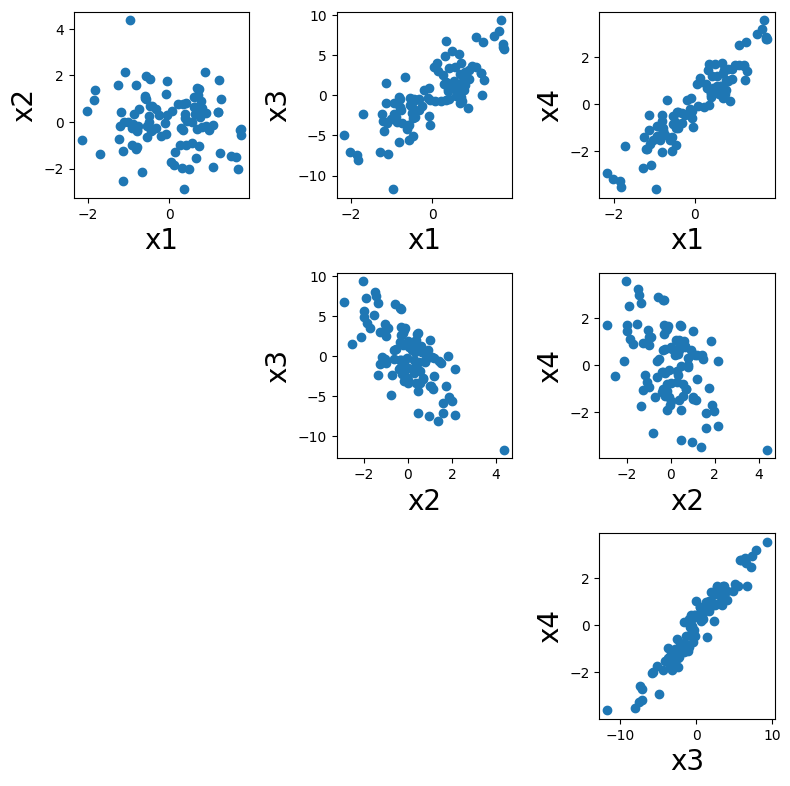

In [53]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

#generate some random data
X = torch.randn(100, 4)
X[:, 2] = 3 * X[:, 0] - 2 * X[:, 1] + torch.normal(0, 0.1, (100,))
X[:, 3] = 1.5 * X[:, 0] - 0.5 * X[:, 1] + torch.normal(0, 0.1, (100,))

#each feature will have zero mean
X = X - X.mean(dim=0)
plt.figure(figsize=(10, 10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4, 4, i*4+j+1)
            plt.scatter(X[:, i].numpy(), X[:, j].numpy())
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

cov_matrix = torch.mm(X.t(), X) / (X.shape[0] - 1)
eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

#print each principal component
for i, component in enumerate(eigenvectors.t()):
    print(f'Principal component {i}')
    print(component)
    print()
#compare with torch.pca_lowrank
U, S, V = torch.pca_lowrank(X)

#have to flip the sign and have to transpose it, else the numbers are backwards
for i in range(eigenvectors.shape[1]):
    if torch.dot(eigenvectors[:, i], V[:, i]) < 0:
        eigenvectors[:, i] *= -1

X_pca = eigenvectors.t()
calculated = torch.transpose(X_pca,0,1)

print("Principal components from torch.pca_lowrank:")
print(V)
print("Principal components from calculation:")
print(calculated)
